<a href="https://colab.research.google.com/github/ambreen2006/DS_bookcamp_exploration/blob/master/DS_BookCamp_DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import matplotlib.pyplot as plt

from math import sin, cos

In [157]:
heights = np.arange(60, 78, 0.1)

In [158]:
np.random.seed(0)
random_fluctuations = np.random.normal(scale=10, size=heights.size)
weights = 4*heights - 130 + random_fluctuations

(array([ 1.,  5., 18., 29., 28., 34., 23., 20., 13.,  9.]),
 array([-25.52989816, -20.59376357, -15.65762898, -10.72149439,
         -5.7853598 ,  -0.8492252 ,   4.08690939,   9.02304398,
         13.95917857,  18.89531316,  23.83144775]),
 <a list of 10 Patch objects>)

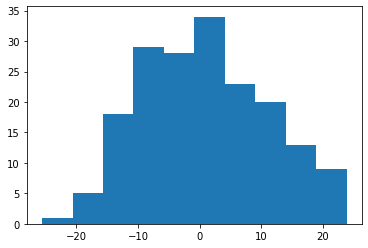

In [159]:
plt.hist(random_fluctuations)

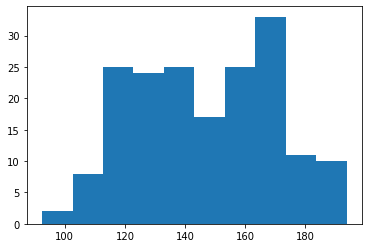

In [160]:
_ = plt.hist(weights)

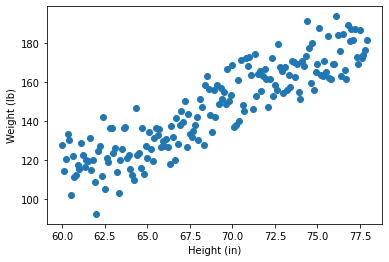

In [161]:
measurements = np.array([heights, weights])
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.show()

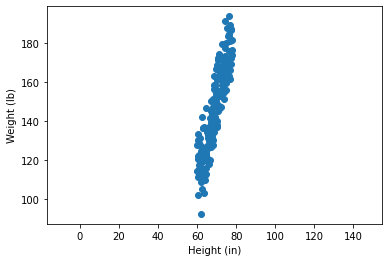

In [162]:
measurements = np.array([heights, weights])
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.axis('equal')
plt.show()

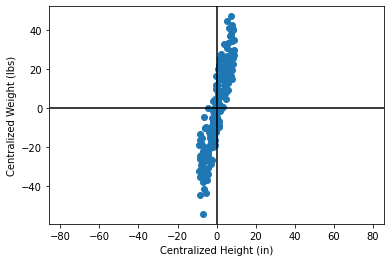

In [163]:
centered_data = np.array([heights - heights.mean(),
                          weights - weights.mean()])
plt.scatter(centered_data[0], centered_data[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lbs)')
plt.axis('equal')
plt.show()

In [164]:
centered_data.shape

(2, 180)

In [165]:
angle = np.radians(-90)
angle_anti = np.radians(90)

rotation_matrix = np.array([[cos(angle), -sin(angle)],
                            [sin(angle), cos(angle)]])

rotation_matrix_anti = np.array([[cos(angle_anti), -sin(angle_anti)],
                                 [sin(angle_anti), cos(angle_anti)]])

In [166]:
rotation_matrix

array([[ 6.123234e-17,  1.000000e+00],
       [-1.000000e+00,  6.123234e-17]])

In [167]:
rotated_data = rotation_matrix @ centered_data
rotated_data_anti = rotation_matrix_anti @ centered_data

Good resources to review how the rotation matrix works:

https://www.khanacademy.org/math/linear-algebra/matrix-transformations

https://livevideo.manning.com/module/98_1_3/3blue1brown-essence-of-linear-algebra/essence-of-linear-algebra/linear-transformations-and-matrices?

https://setosa.io/ev/sine-and-cosine/#:~:text=Sine%20and%20cosine%20%E2%80%94%20a.k.a.%2C%20sin,adjacent%20side%20to%20the%20hypotenuse%20.

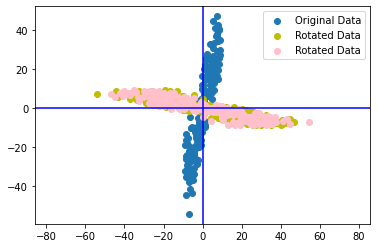

In [168]:
plt.scatter(centered_data[0], centered_data[1], label='Original Data')
plt.scatter(rotated_data[0], rotated_data[1], label='Rotated Data', c = 'y')
plt.scatter(rotated_data_anti[0], rotated_data_anti[1], label='Rotated Data', c = 'pink')

plt.axhline(0, c='b')
plt.axvline(0, c='b')
plt.legend()
plt.axis('equal')
plt.show()

In [169]:
data_labels = ['unrotated', 'rotated']
data_list = [centered_data, rotated_data]
for data_label, data in zip(data_labels, data_list):
    y_values = data[1]
    penalty = y_values @ y_values/y_values.size
    print(f'The penalty score for the {data_label} data is {penalty:.2f}')

The penalty score for the unrotated data is 519.82
The penalty score for the rotated data is 27.00


In [170]:
for data_label, data in zip(data_labels, data_list):
  y_var = data[1].var()
  assert  y_var == data[1]@data[1]/data[1].size
  print(f'The y-axis variance for the {data_label} data is {y_var:.2f}')

The y-axis variance for the unrotated data is 519.82
The y-axis variance for the rotated data is 27.00


X-axis variance

In [171]:
for data_label, data in zip(data_labels, data_list):
  x_var = data[0].var()
  print(f'The x-axis variance for the {data_label} data is {x_var:.2f}')

The x-axis variance for the unrotated data is 27.00
The x-axis variance for the rotated data is 519.82


In [172]:
total_variance = centered_data[0].var() + centered_data[1].var()
assert total_variance == rotated_data[0].var() + rotated_data[1].var()

This entails that:
  * x_values.var() / total_variance == 1 - y_values.var()/total_variance
  * Rotating the data towards the x-axis will lead to an increase in the x-axis variance, and equivalent decrease in y-axis variance.



In [173]:
for data_label, data in zip(data_labels, data_list):
  p_x_var = 100 * data[0].var()/total_variance
  p_y_var = 100 * data[1].var()/total_variance
  print(f'In the {data_label} data, {p_x_var:.2f}% of the total variance is distributed across the x-axis')
  print(f'The remaining {p_y_var:.2f}% of the total variance is distributed across the y-axis\n')

In the unrotated data, 4.94% of the total variance is distributed across the x-axis
The remaining 95.06% of the total variance is distributed across the y-axis

In the rotated data, 95.06% of the total variance is distributed across the x-axis
The remaining 4.94% of the total variance is distributed across the y-axis



Maximizing horizontal dispersion

In [174]:
def rotate(angle, data=centered_data):
  angle = np.radians(-angle)
  rotation_matrix = np.array([[cos(angle), -sin(angle)],
                              [sin(angle), cos(angle)]])
  return rotation_matrix @ data

In [175]:
rotate(angle).shape

(2, 180)

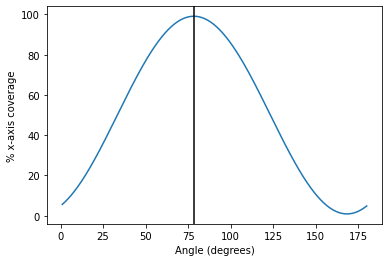

The horizontal variance is maximized to approximately 541 after a 78.30 deg rotation.
The rotation distributes 


In [176]:
angles = np.arange(1, 180, 0.1)
x_variances = [(rotate(angle)[0].var()) for angle in angles]
p_x_var = 100*np.array(x_variances)/total_variance
optimal_index = np.argmax(p_x_var)
optimal_angle = angles[optimal_index]
plt.plot(angles, p_x_var)
plt.axvline(optimal_angle, c='k')
plt.xlabel('Angle (degrees)')
plt.ylabel('% x-axis coverage')
plt.show()

max_coverage = p_x_var[optimal_index]
max_x_var = x_variances[optimal_index]

print('The horizontal variance is maximized to approximately '
       f'{int(max_x_var)} after a {optimal_angle:.2f} deg rotation.')
print(f'The rotation distributes ')

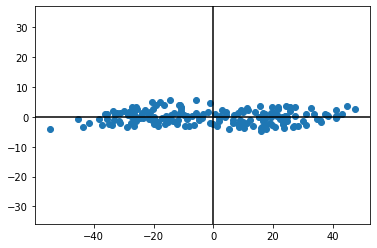

In [177]:
best_rotated_data = rotate(optimal_angle)
plt.scatter(best_rotated_data[0], best_rotated_data[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.axis('equal')
plt.show()

In [178]:
x_values = best_rotated_data[0]
sorted_x_values = sorted(x_values)
cluster_size = int(x_values.size/3)
small_cutoff = max(sorted_x_values[:cluster_size])
larger_cutoff = min(sorted_x_values[-cluster_size:])
print(f"A 1D threshold of {small_cutoff:.2f} seperates the small sized and"
        " medium sized customers")
print(f"A 1D threshold of {larger_cutoff:.2f} seperates the medium sized "
        "and large sized customers")

A 1D threshold of -14.61 seperates the small sized and medium sized customers
A 1D threshold of 15.80 seperates the medium sized and large sized customers


In [179]:
def plot_customer_segments(horizontal_2d_data):
  small, medium, large = [], [], []
  cluster_labels = ['Small', 'Medium', 'Large']
  for x_value, y_value in horizontal_2d_data:
    if x_value <= small_cutoff:
      small.append([x_value, y_value])
    elif small_cutoff < x_value < larger_cutoff:
      medium.append([x_value, y_value])
    else:
      large.append([x_value, y_value])
  
  for i, cluster in enumerate([small, medium, large]):
    cluster_x_values, cluster_y_values = np.array(cluster).T
    plt.scatter(cluster_x_values, cluster_y_values,
                color=['g', 'b', 'y'][i],
                label=cluster_labels[i])
  
  plt.axhline(0, c='black')
  plt.axvline(larger_cutoff, c='black', linewidth=3, 
              linestyle='--')
  plt.axvline(small_cutoff, c='black', linewidth=3,
              linestyle='--')
  plt.axis('equal')
  plt.legend()
  plt.show()

In [180]:
best_rotated_data.shape

(2, 180)

In [181]:
best_rotated_data.T.shape

(180, 2)

In [182]:
best_rotated_data.T[0:10]

array([[-20.51052004,   4.89237696],
       [-33.45412449,   2.10976353],
       [-27.3765617 ,   3.26624448],
       [-14.60528207,   5.80892754],
       [-17.84909775,   5.0350438 ],
       [-45.29441166,  -0.75072928],
       [-26.00923337,   3.14091734],
       [-36.38287233,   0.89051819],
       [-35.49952271,   0.9713293 ],
       [-30.05613813,   1.99647825]])

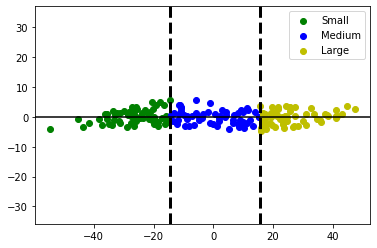

In [183]:
plot_customer_segments(best_rotated_data.T)

In [184]:
zero_y_values = np.zeros(x_values.size)
reproduced_data = rotate(-optimal_angle, data=[x_values, zero_y_values])

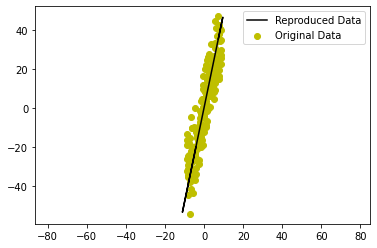

In [185]:
plt.plot(reproduced_data[0], reproduced_data[1], c='k', 
         label='Reproduced Data')
plt.scatter(centered_data[0], centered_data[1], c='y', 
            label='Original Data')
plt.axis('equal')
plt.legend()
plt.show()

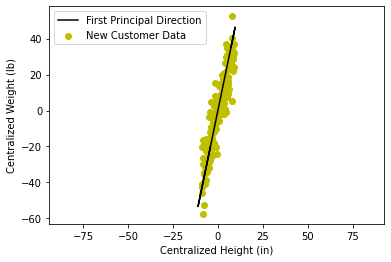

In [186]:
np.random.seed(1)
new_heights = np.arange(60, 78, .11)
random_fluctuations = np.random.normal(scale=10, 
                                       size=new_heights.size)
new_weights = 4*new_heights - 130 + random_fluctuations
new_centered_data = np.array([new_heights - heights.mean(),
                              new_weights - weights.mean()])
plt.scatter(new_centered_data[0], new_centered_data[1], c='y',
            label='New Customer Data')
plt.plot(reproduced_data[0], reproduced_data[1], c='k',
         label='First Principal Direction')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lb)')
plt.axis('equal')
plt.legend()
plt.show()

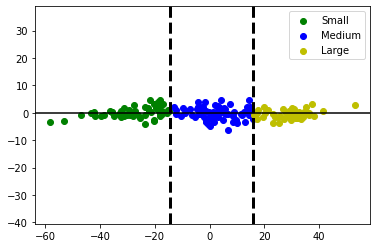

In [187]:
new_horizontal_data = rotate(optimal_angle, data=new_centered_data)
plot_customer_segments(new_horizontal_data.T)

# Dimension Reduction using PCA

In [188]:
from sklearn.decomposition import PCA

In [189]:
pca_obj = PCA()

In [190]:
measurements.shape

(2, 180)

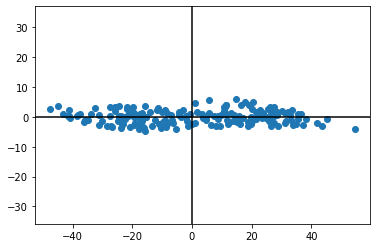

In [191]:
pca_transformed_data = pca_obj.fit_transform(measurements.T)
plt.scatter(pca_transformed_data[:,0], pca_transformed_data[:, 1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.axis('equal')
plt.show()

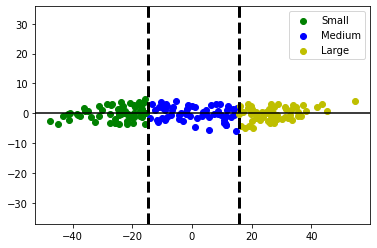

In [192]:
plot_customer_segments(pca_transformed_data*np.array([1, -1]))

In [193]:
percent_variance_coverages = 100*pca_obj.explained_variance_ratio_
x_axis_coverage, y_axis_coverage = percent_variance_coverages
print(f"The x-axis of our PCA output covers {x_axis_coverage:.2f}% of the total variance")

The x-axis of our PCA output covers 99.08% of the total variance


In [194]:
from numpy.linalg import norm

first_pc = pca_obj.components_[0]
magnitude = norm(first_pc)
print(f"Vector {first_pc} points in a direction that covers "
      f"{x_axis_coverage:.2f}% of the total variance.")
print(f"The vector has a magnitude of {magnitude}")

Vector [-0.20223994 -0.979336  ] points in a direction that covers 99.08% of the total variance.
The vector has a magnitude of 1.0


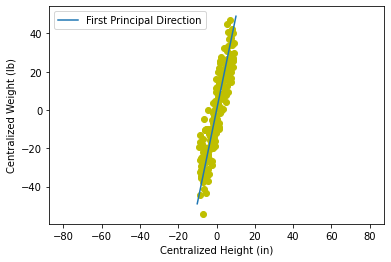

In [195]:
def plot_stretched_vector(v, **kwargs):
  plt.plot([-50*v[0], 50*v[0]], 
           #[v[1], v[1]],
           [-50*v[1], 50*v[1]], 
           **kwargs)

plot_stretched_vector(first_pc, label='First Principal Direction')
#plt.plot(reproduced_data[0], reproduced_data[1], c='k', 
#         label='First Principal Direction')
plt.scatter(centered_data[0], centered_data[1], c='y')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lb)')
plt.axis('equal')
plt.legend()
plt.show()

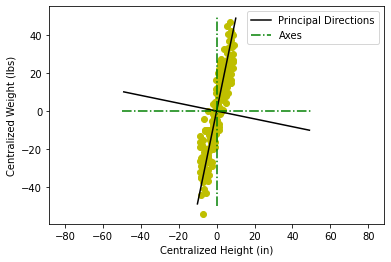

In [196]:
principal_components = pca_obj.components_
for i, pc in enumerate(principal_components):
  plot_stretched_vector(pc, c='k',
                        label='Principal Directions' if i == 0 else None)

for i, axis_vector in enumerate([np.array([0, 1]), np.array([1, 0])]):
  plot_stretched_vector(axis_vector, c='g', linestyle='-.',
                        label='Axes' if i == 0 else None)

plt.scatter(centered_data[0], centered_data[1], c='y')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lbs)')
plt.axis('equal')
plt.legend()
plt.show()

In [197]:
projections = principal_components @ centered_data

In [198]:
assert np.allclose(pca_transformed_data.T, projections)

# Clustering 4D Data In 2-Dimensions

In [199]:
from sklearn.datasets import load_iris
flower_data = load_iris()
flower_measurements = flower_data['data']
num_flowers, num_measurements = flower_measurements.shape
print(f"{num_flowers} flowers have been measured")
print(f"{num_measurements} measurements were recorded for every flower")
print(f"The first flower has the following measurements (in cm): {flower_measurements[0]}")

150 flowers have been measured
4 measurements were recorded for every flower
The first flower has the following measurements (in cm): [5.1 3.5 1.4 0.2]


In [200]:
pca_object_2d = PCA(n_components=2)
transformed_data_2D = pca_object_2d.fit_transform(flower_measurements)

In [201]:
row_count, column_count = transformed_data_2D.shape
print(f"The matrix contains {row_count} rows, corresponding to "
      f"{row_count} recorded flowers")
print(f"It also contains {column_count} columns, corresponding to "
      f"{column_count} dimensions")

The matrix contains 150 rows, corresponding to 150 recorded flowers
It also contains 2 columns, corresponding to 2 dimensions


In [202]:
def print_2D_variance_coverage(pca_object):
  
  percent_var_coverages = 100*pca_object.explained_variance_ratio_
  x_axis_coverage, y_axis_coverage = percent_var_coverages
  total_coverage = x_axis_coverage + y_axis_coverage
  print(f"The x-axis covers {x_axis_coverage:.2f}% of the total variance")
  print(f"The y-axis covers {y_axis_coverage:.2f}% of the total variance")
  print(f"Together, the 2 axes covers {total_coverage:.2f}% of the total variance")

print_2D_variance_coverage(pca_object_2d)

The x-axis covers 92.46% of the total variance
The y-axis covers 5.31% of the total variance
Together, the 2 axes covers 97.77% of the total variance


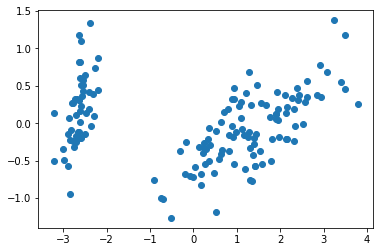

In [203]:
plt.scatter(transformed_data_2D[:,0], transformed_data_2D[:, 1])
plt.show()

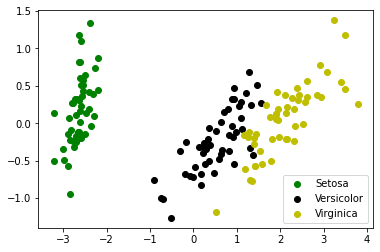

In [204]:
def visualize_flower_data(dim_reduced_data):
  species_names = flower_data['target_names']

  for i, species in enumerate(species_names):
    species_data = np.array([dim_reduced_data[j] 
                             for j in range(dim_reduced_data.shape[0])
                             if flower_data['target'][j] == i]).T
    plt.scatter(species_data[0], species_data[1], label=species.title(),
                color=['g', 'k', 'y'][i])
  plt.legend()
  plt.show()

visualize_flower_data(transformed_data_2D)

In [205]:
def detect_setosa(flower_sample):
  centered_sample = flower_sample - pca_object_2d.mean_
  projection = pca_object_2d.components_[0] @ centered_sample
  print(projection)
  is_setosa = projection < -2
  if is_setosa:
    print("The sample could be a setosa")
  else:
    print("The sampel is not a setosa")

new_flower_sample = np.array([4.8, 3.7, 1.2, 0.24])
detect_setosa(new_flower_sample)

-2.9664486596219657
The sample could be a setosa


# Limitations of PCA

In [206]:
'''
first_axis_var = flower_measurements[:, 0].var()
print(f"The variance of the first axis is: {first_axis_var:.2f}")
flower_measurements[:, 0] *= 10
first_axis_var = flower_measurements[:,0].var()
print(f"We've converted the measurements from cm to mm.\n"
      f"The variance now equals {first_axis_var:.2f}")
'''

'\nfirst_axis_var = flower_measurements[:, 0].var()\nprint(f"The variance of the first axis is: {first_axis_var:.2f}")\nflower_measurements[:, 0] *= 10\nfirst_axis_var = flower_measurements[:,0].var()\nprint(f"We\'ve converted the measurements from cm to mm.\n"\n      f"The variance now equals {first_axis_var:.2f}")\n'

# Computing Principal Components Without Rotation

## Computing a covariance matrix

In [207]:
cov_matrix = centered_data @ centered_data.T / centered_data.shape[1]
print(f"Covariance matrix:\n{cov_matrix}")
for i in range(centered_data.shape[0]):
  variance = cov_matrix[i][i]
  assert round(variance, 10) == round(centered_data[i].var(), 10)

Covariance matrix:
[[ 26.99916667 106.30456732]
 [106.30456732 519.8206294 ]]


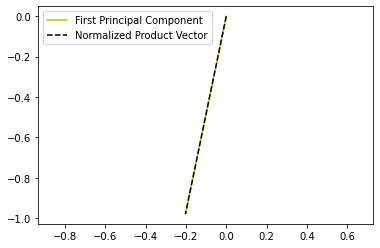

In [208]:
def plot_vector(vector, **kwargs):
  plt.plot([0, vector[0]], [0, vector[1]], **kwargs)

plot_vector(first_pc, c='y', label='First Principal Component')
product_vector = cov_matrix @ first_pc
product_vector /= norm(product_vector)
plot_vector(product_vector, c='k', linestyle='--',
            label='Normalized Product Vector')
plt.legend()
plt.axis('equal')
plt.show()

In [209]:
product_vector2 = cov_matrix @ product_vector
product_vector2 /= norm(product_vector2)
cosine_similarity = product_vector @ product_vector2
angle = np.degrees(np.arccos(cosine_similarity))
print(f"The angle between vectors equals {angle:.2f} degrees")

The angle between vectors equals 0.00 degrees


In [210]:
print(f"{product_vector.shape}")

(2,)


In [211]:
product_vector

array([-0.20223994, -0.979336  ])

In [212]:
new_magnitude = norm(cov_matrix @ first_pc)
print(f"Multiplication has stretched the first principal component "
      f"by approximately {new_magnitude:.2f} units.")

Multiplication has stretched the first principal component by approximately 541.77 units.


In [213]:
first_pc

array([-0.20223994, -0.979336  ])

In [214]:
cov_matrix @ first_pc

array([-109.56819993, -530.57808676])

In [215]:
variance = (centered_data.T @ first_pc).var()
direction1_var = projections[0].var()
print(f"The variance along the first principal direction is "
      f"approximately {variance:.2f}")

The variance along the first principal direction is approximately 541.77


## Extracting Eigenvectors Using Power Iteration

In [216]:
np.random.seed(0)
random_vector = np.random.random(size=2)
random_vector /= norm(random_vector)

In [217]:
random_vector

array([0.60878196, 0.79333759])

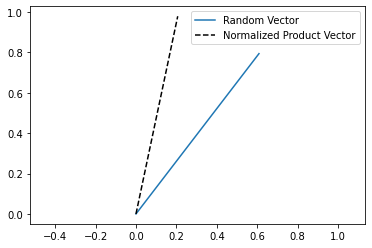

In [218]:
product_vector = cov_matrix @ random_vector
product_vector /= norm(product_vector)
plt.plot([0, random_vector[0]], [0, random_vector[1]], label='Random Vector')
plt.plot([0, product_vector[0]], [0, product_vector[1]], 
         label='Normalized Product Vector', linestyle='--', c='k')
plt.legend()
plt.axis('equal')
plt.show()

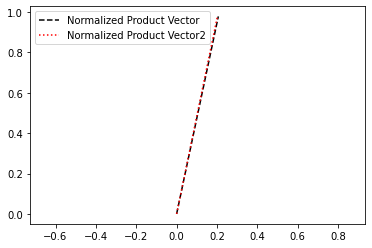

In [219]:
product_vector2 = cov_matrix @ product_vector
product_vector2 /= norm(product_vector2)
plt.plot([0, product_vector[0]], [0, product_vector[1]], linestyle='--',
         c='k', label='Normalized Product Vector')
plt.plot([0, product_vector2[0]], [0, product_vector2[1]], linestyle=':',
         c='r', label='Normalized Product Vector2')
plt.legend()
plt.axis('equal')
plt.show()

In [220]:
np.random.seed(0)
def power_iteration(matrix):
  random_vector = np.random.random(size=matrix.shape[0])
  random_vector = random_vector / norm(random_vector)
  old_rotated_vector = random_vector
  for _ in range(10):
    rotated_vector = matrix @ old_rotated_vector
    rotated_vector /= norm(rotated_vector)
    old_rotated_vector = rotated_vector
  
  eigenvector = rotated_vector
  eigenvalue = norm(matrix @ eigenvector)
  return eigenvector, eigenvalue

eigenvector, eigenvalue = power_iteration(cov_matrix)
print(f"The extracted eigenvector is {eigenvector}")
print(f"It's eigenvalue is approx {eigenvalue:.2f}")

The extracted eigenvector is [0.20223994 0.979336  ]
It's eigenvalue is approx 541.77


In [221]:
outer_product = np.outer(eigenvector, eigenvector)
for i in range(eigenvector.size):
  for j in range(eigenvector.size):
    assert outer_product[i][j] == eigenvector[i] * eigenvector[j]

In [222]:
deflated_matrix = cov_matrix - eigenvalue * outer_product

In [223]:
deflated_matrix

array([[ 4.84009999, -0.99951554],
       [-0.99951554,  0.20640716]])

(-9.84500000000013, 9.845000000000159, -59.32393974187961, 52.02380082428293)

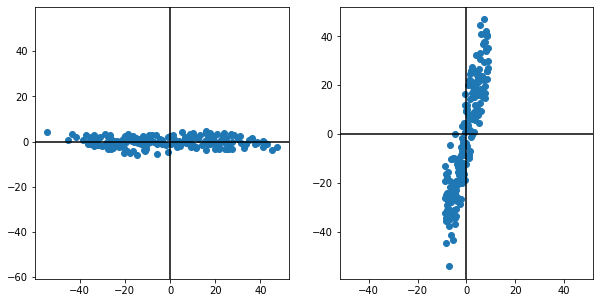

In [224]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
np.random.seed(0)
next_eigenvector, _ = power_iteration(deflated_matrix)
components = np.array([eigenvector, next_eigenvector])
projections = components @ centered_data 
axs[0].scatter(projections[0], projections[1])
axs[0].axhline(0, c='black')
axs[0].axvline(0, c='black')
axs[0].axis('equal')
axs[1].scatter(centered_data[0], centered_data[1])
axs[1].axhline(0, c='black')
axs[1].axvline(0, c='black')
axs[1].axis('equal')

### Extracting top-k principal components

In [225]:
def find_top_principal_components(centered_matrix, k=2):
  cov_matrix = centered_matrix @ centered_matrix.T
  cov_matrix /= centered_matrix[1].size
  return find_top_eigenvectors(cov_matrix, k=k)

def find_top_eigenvectors(matrix, k=2):
  matrix = matrix.copy()
  eigenvectors = []
  for _ in range(k):
    eigenvector, eigenvalue = power_iteration(matrix)
    eigenvectors.append(eigenvector)
    matrix -= eigenvalue * np.outer(eigenvector, eigenvector)
  return np.array(eigenvectors)

In [226]:
def reduce_dimensions(data, k=2, centralize_data=True):
  data = data.T.copy()
  if centralize_data:
    for i in range(data.shape[0]):
      data[i] -= data[i].mean()
  
  principal_components = find_top_principal_components(data)
  return (principal_components @ data).T

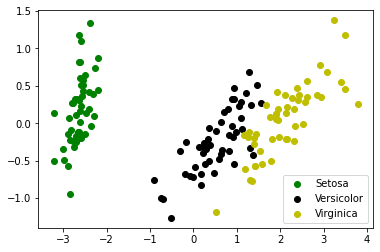

In [227]:
np.random.seed(0)
dim_reduced_data = reduce_dimensions(flower_measurements)
visualize_flower_data(dim_reduced_data)

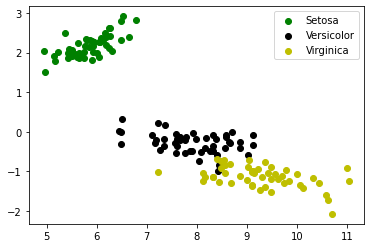

In [228]:
np.random.seed(3)
dim_reduced_data = reduce_dimensions(flower_measurements, centralize_data=False)
visualize_flower_data(dim_reduced_data)

In [229]:
variances = [sum(data[:,i].var() for i in range(data.shape[1])) 
                                    for data in [dim_reduced_data, flower_measurements]]

In [230]:
dim_reduced_var, total_var = variances
percent_coverage = 100*dim_reduced_var / total_var
print(f"Our plot covers {percent_coverage:.2f} of the total variance")

Our plot covers 97.72 of the total variance


# Dimension Reduction Using SVD and Scikit-Learn

In [231]:
from sklearn.decomposition import TruncatedSVD

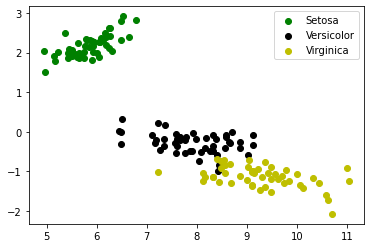

In [232]:
svd_object = TruncatedSVD(n_components=2)
svd_transformed_data = svd_object.fit_transform(flower_measurements)
visualize_flower_data(svd_transformed_data)

In [234]:
percent_variance_coverages = 100*svd_object.explained_variance_ratio_
x_axis_coverage, y_axis_coverage = percent_variance_coverages
total_2d_coverage = x_axis_coverage + y_axis_coverage
print(f"Our Scikit-Learn SVD output covers {total_2d_coverage:.2f}% of the total variance")

Our Scikit-Learn SVD output covers 97.72% of the total variance
